# Exploratory Data Analysis

Importing relevant libraries

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np

# First dataset - tips (seaborn)

## 1. Dataset Description

### Importing the dataset

In [6]:
tips = sns.load_dataset("tips")

df_tips = tips.copy()

In [7]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Understanding the dataset

In [8]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
df_tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

The dataset is formed by 7 variables, with 244 samples each and no NAN data. There are 4 categorical variables, 2 float variables and 1 integer variable

### Creating the dictionary 

In [28]:
tips_dict = {
    'total_bill': {'description': 'total value of the bill', 'type': 'quantitative', 'subtype': 'continuous'}, 
    'tip': {'description': 'tip given by the costumer', 'type': 'quantitative', 'subtype': 'continuous'}, 
    'sex': {'description':'sex of the client', 'type': 'qualitative', 'subtype': 'nominal'}, 
    'smoker': {'description':'if the costumer smokes or not', 'type': 'qualitative', 'subtype': 'nominal'}, 
    'day': {'description':'day of the week of bill emission', 'type': 'qualitative', 'subtype': 'nominal'}, 
    'time': {'description':'meal time of bill emission', 'type': 'qualitative', 'subtype': 'nominal'}, 
    'size': {'description':'size of bill', 'type': 'quantitative', 'subtype': 'discrete'}
}

print(tips_dict)

{'total_bill': {'description': 'total value of the bill', 'type': 'quantitative', 'subtype': 'continuous'}, 'tip': {'description': 'tip given by the costumer', 'type': 'quantitative', 'subtype': 'continuous'}, 'sex': {'description': 'sex of the client', 'type': 'qualitative', 'subtype': 'nominal'}, 'smoker': {'description': 'if the costumer smokes or not', 'type': 'qualitative', 'subtype': 'nominal'}, 'day': {'description': 'day of the week of bill emission', 'type': 'qualitative', 'subtype': 'nominal'}, 'time': {'description': 'meal time of bill emission', 'type': 'qualitative', 'subtype': 'nominal'}, 'size': {'description': 'size of bill', 'type': 'quantitative', 'subtype': 'discrete'}}


### Describing quantitative data

In [26]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Above, we have a consensed view of the information of the quantitative variables of the dataset. But, analyzing each one individually, we have:

Important functions: calculating interquantile range and intervals

In [40]:
def IQR_range(data):
    Q3 = np.quantile(data, 0.75)
    Q1 = np.quantile(data, 0.25)
    IQR = Q3 - Q1
    return IQR

def interval(data):
    return data.max() - data.min()

#### total_bill

##### Central Tendency statistics

In [32]:
print(f'Mean:', df_tips['total_bill'].mean())
print(f'Median:', df_tips['total_bill'].median())
print(f'Mode:', df_tips['total_bill'].mode())

Mean: 19.78594262295082
Median: 17.795
Mode: 0    13.42
Name: total_bill, dtype: float64


##### Dispersion Statistics

In [41]:
print(f'Standard Deviation:', df_tips['total_bill'].std())
print(f'Interquartile range:', IQR_range(df_tips['total_bill']))
print(f'Interval:', interval(df_tips['total_bill']))

Standard Deviation: 8.902411954856856
Interquartile range: 10.779999999999998
Interval: 47.74


#### tip

##### Central Tendency statistics

In [42]:
print(f'Mean:', df_tips['tip'].mean())
print(f'Median:', df_tips['tip'].median())
print(f'Mode:', df_tips['tip'].mode())

Mean: 2.99827868852459
Median: 2.9
Mode: 0    2.0
Name: tip, dtype: float64


##### Dispersion Statistics

In [43]:
print(f'Standard Deviation:', df_tips['tip'].std())
print(f'Interquartile range:', IQR_range(df_tips['tip']))
print(f'Interval:', interval(df_tips['tip']))

Standard Deviation: 1.3836381890011822
Interquartile range: 1.5625
Interval: 9.0


#### size

##### Central Tendency statistics

In [44]:
print(f'Mean:', df_tips['size'].mean())
print(f'Median:', df_tips['size'].median())
print(f'Mode:', df_tips['size'].mode())

Mean: 2.569672131147541
Median: 2.0
Mode: 0    2
Name: size, dtype: int64


##### Dispersion Statistics

In [45]:
print(f'Standard Deviation:', df_tips['size'].std())
print(f'Interquartile range:', IQR_range(df_tips['size']))
print(f'Interval:', interval(df_tips['size']))

Standard Deviation: 0.9510998047322344
Interquartile range: 1.0
Interval: 5


### Insights on quantitative data

It is noticeable that the functions used in the separate quantitative variables descriptions are yield results that are very approximate to the ones given by the .describe() function.

### Describing qualitative data

In [46]:
df_tips.astype('object').describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.00,244.0,244,244,244,244,244
unique,229.00,123.0,2,2,4,2,6
top,13.42,2.0,Male,No,Sat,Dinner,2
freq,3.00,33.0,157,151,87,176,156


After using the function .astype('object'), it is possible to visualize categorical data (sex, smoker, day, time). Since all of these 
variables are nominal, we cannot order them to retrieve values such as mean, median, standard deviation, interquartile range and interval. But the mode value and their relation with other variables can be considered.

#### sex 

In [62]:
mode_sex = df_tips['sex'].value_counts()

print(mode_sex)
print(f'Mode:', mode_sex.idxmax())

sex
Male      157
Female     87
Name: count, dtype: int64
Mode: Male


Plotting data is a very important manner of visualizing how data is being distributed and can confirm the information obtained above

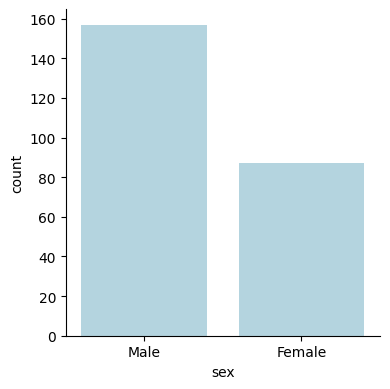

In [78]:
sns.catplot(data=tips, x="sex", kind="count", color="lightblue", height=4)

#### smoker

In [63]:
mode_smoker = df_tips['smoker'].value_counts()

print(mode_smoker)
print(f'Mode:', mode_smoker.idxmax())

smoker
No     151
Yes     93
Name: count, dtype: int64
Mode: No


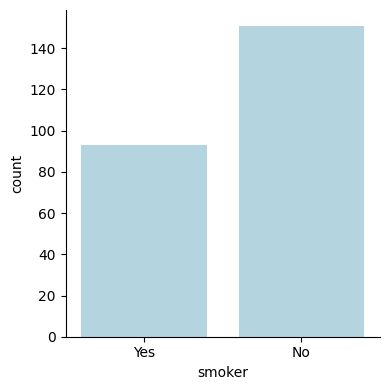

In [79]:
sns.catplot(data=tips, x="smoker", kind="count", color="lightblue", height=4)

#### day

In [64]:
mode_day = df_tips['day'].value_counts()

print(mode_day)
print(f'Mode:', mode_day.idxmax())

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
Mode: Sat


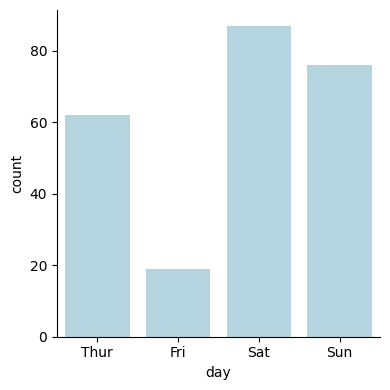

In [80]:
sns.catplot(data=tips, x="day", kind="count", color="lightblue", height=4)

#### time

In [65]:
mode_time = df_tips['time'].value_counts()

print(mode_time)
print(f'Mode:', mode_time.idxmax())

time
Dinner    176
Lunch      68
Name: count, dtype: int64
Mode: Dinner


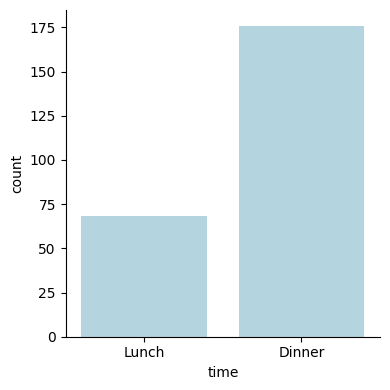

In [81]:
sns.catplot(data=tips, x="time", kind="count", color="lightblue", height=4)

### Insights on qualitative data

Although it is harder to retrieve information from categorical (qualitative) data, some very important data can be retrieved by it, also analyzing the correlation of the categorical data with other types of data and, consequently, understanding the dataset as a whole better.